<a href="https://colab.research.google.com/github/krishnaaxo/Perth_houseprice_prediction_AutoSklearn/blob/main/AutoSklearn_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install autoviz

In [ ]:
pip install dask distributed --upgrade

In [ ]:
!pip install scikit-learn==0.24.0

In [ ]:
pip install auto-sklearn

In [5]:
# Import Lab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [6]:
df= pd.read_csv('/content/all_perth_310121.csv')
df.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,Unnamed: 16
0,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,129.0
1,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,113.0
2,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,NaN
3,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [7]:
df.head().T


,0,1,2,3,4
SUBURB,South Lake,Wandi,Camillo,Bellevue,Lockridge
PRICE,565000,365000,287000,255000,325000
BEDROOMS,4,3,3,2,4
BATHROOMS,2,2,1,1,1
GARAGE,2,2,1,2,2
LAND_AREA,600,351,719,651,466
FLOOR_AREA,160,139,86,59,131
BUILD_YEAR,2003,2013,1979,1953,1998
CBD_DIST,18300,26900,22600,17900,11200
NEAREST_STN,Cockburn Central Station,Kwinana Station,Challis Station,Midland Station,Bassendean Station


In [8]:
df['SUBURB'].unique

<bound method Series.unique of 0             South Lake
1                  Wandi
2                Camillo
3               Bellevue
4              Lockridge
              ...       
33651    South Fremantle
33652        Westminster
33653        Westminster
33654         Girrawheen
33655            Midland
Name: SUBURB, Length: 33656, dtype: object>

In [9]:
del df['SUBURB']

In [10]:
df['NEAREST_STN'].unique

<bound method Series.unique of 0        Cockburn Central Station
1                 Kwinana Station
2                 Challis Station
3                 Midland Station
4              Bassendean Station
                   ...           
33651           Fremantle Station
33652            Stirling Station
33653            Stirling Station
33654             Warwick Station
33655             Midland Station
Name: NEAREST_STN, Length: 33656, dtype: object>

In [11]:
del df['NEAREST_STN']

In [12]:
df['NEAREST_SCH'].unique

<bound method Series.unique of 0                        LAKELAND SENIOR HIGH SCHOOL
1                                     ATWELL COLLEGE
2                       KELMSCOTT SENIOR HIGH SCHOOL
3                       SWAN VIEW SENIOR HIGH SCHOOL
4                                      KIARA COLLEGE
                            ...                     
33651                    CHRISTIAN BROTHERS' COLLEGE
33652    JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL
33653    JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL
33654                  GIRRAWHEEN SENIOR HIGH SCHOOL
33655                               LA SALLE COLLEGE
Name: NEAREST_SCH, Length: 33656, dtype: object>

In [13]:
del df['NEAREST_SCH']

In [14]:
del df['Unnamed: 16']

In [15]:
df

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
0,565000,4,2,2.0,600,160,2003.0,18300,1800,6164,-32.115900,115.842450,0.828339
1,365000,3,2,2.0,351,139,2013.0,26900,4900,6167,-32.193470,115.859553,5.524324
2,287000,3,1,1.0,719,86,1979.0,22600,1900,6111,-32.120578,115.993579,1.649178
3,255000,2,1,2.0,651,59,1953.0,17900,3600,6056,-31.900547,116.038009,1.571401
4,325000,4,1,2.0,466,131,1998.0,11200,2000,6054,-31.885790,115.947780,1.514922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,1040000,4,3,2.0,292,245,2013.0,16100,1500,6162,-32.064580,115.751820,1.430350
33652,410000,3,2,2.0,228,114,NaN,9600,4600,6061,-31.867055,115.841403,1.679644
33653,427000,3,2,2.0,261,112,NaN,9600,4600,6061,-31.866890,115.841418,1.669159
33654,295000,3,1,2.0,457,85,1974.0,12600,4400,6064,-31.839680,115.842410,0.358494


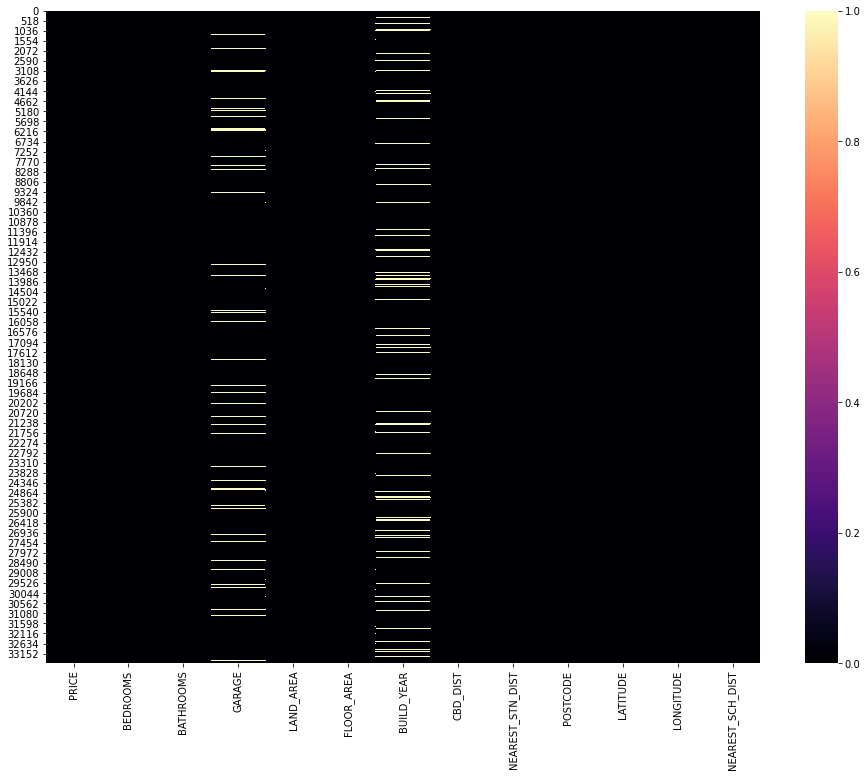

In [16]:
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(), cmap = 'magma')

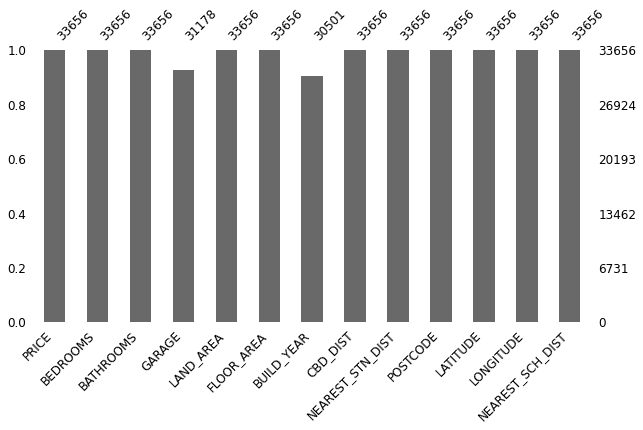

In [17]:
import missingno
missingno.bar(df, figsize=(10,5), fontsize=12);

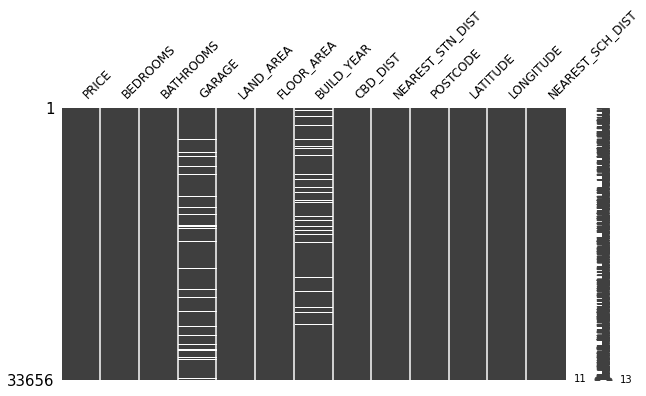

In [18]:
missingno.matrix(df,figsize=(10,5), fontsize=12);

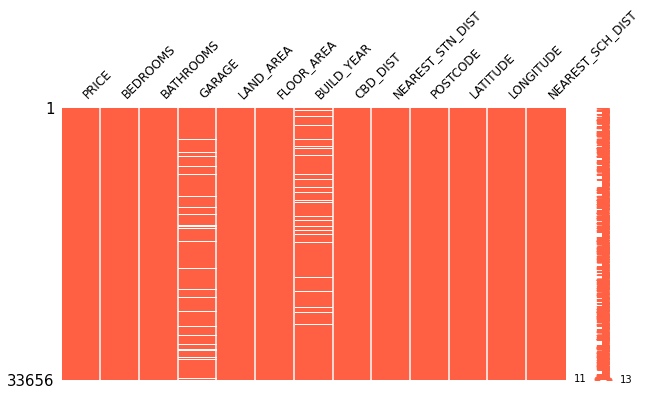

In [19]:
missingno.matrix(df, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

In [20]:
df.fillna(df.mean(), inplace=True)
df

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
0,565000,4,2,2.0,600,160,2003.000000,18300,1800,6164,-32.115900,115.842450,0.828339
1,365000,3,2,2.0,351,139,2013.000000,26900,4900,6167,-32.193470,115.859553,5.524324
2,287000,3,1,1.0,719,86,1979.000000,22600,1900,6111,-32.120578,115.993579,1.649178
3,255000,2,1,2.0,651,59,1953.000000,17900,3600,6056,-31.900547,116.038009,1.571401
4,325000,4,1,2.0,466,131,1998.000000,11200,2000,6054,-31.885790,115.947780,1.514922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,1040000,4,3,2.0,292,245,2013.000000,16100,1500,6162,-32.064580,115.751820,1.430350
33652,410000,3,2,2.0,228,114,1989.706436,9600,4600,6061,-31.867055,115.841403,1.679644
33653,427000,3,2,2.0,261,112,1989.706436,9600,4600,6061,-31.866890,115.841418,1.669159
33654,295000,3,1,2.0,457,85,1974.000000,12600,4400,6064,-31.839680,115.842410,0.358494


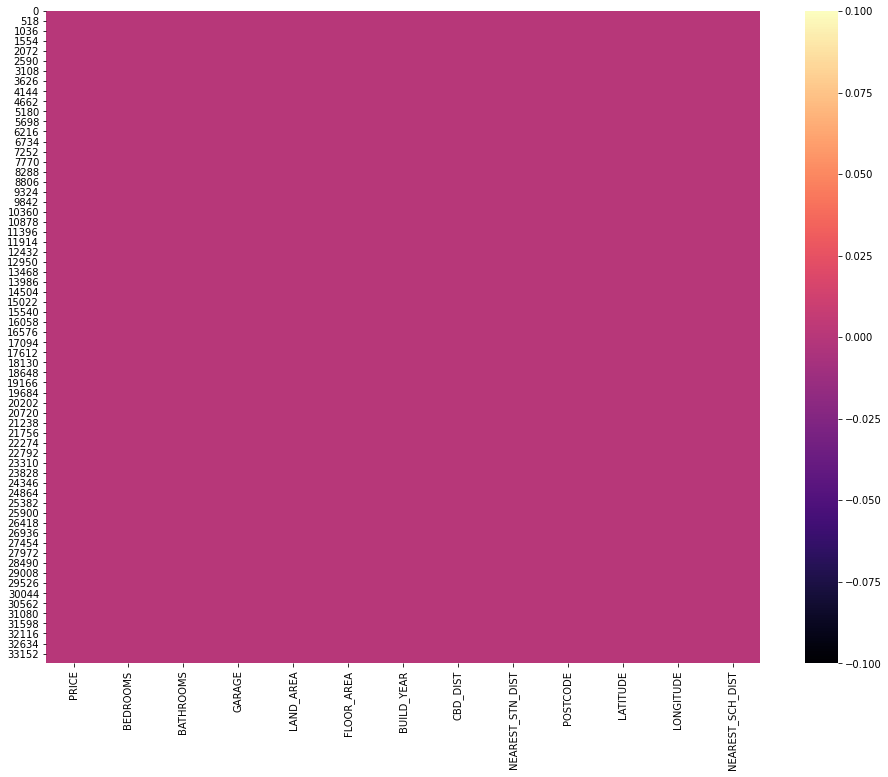

In [21]:
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(), cmap = 'magma')

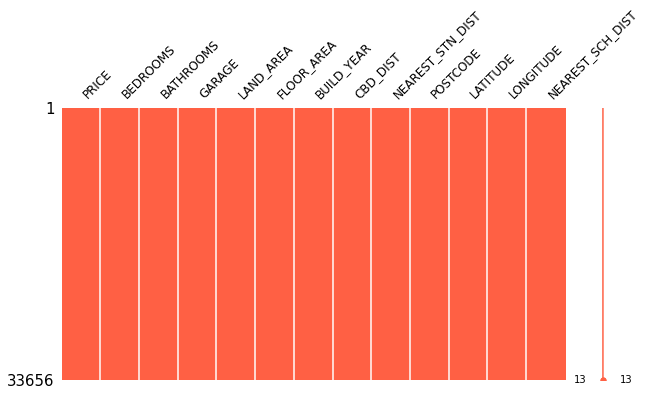

In [22]:
missingno.matrix(df, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


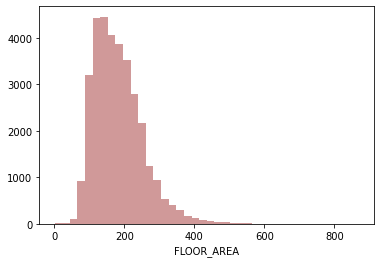

In [23]:
sns.distplot(df['FLOOR_AREA'].dropna(),kde=False,color='darkred',bins=40)

In [24]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (33656, 17)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  8
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    17 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 21


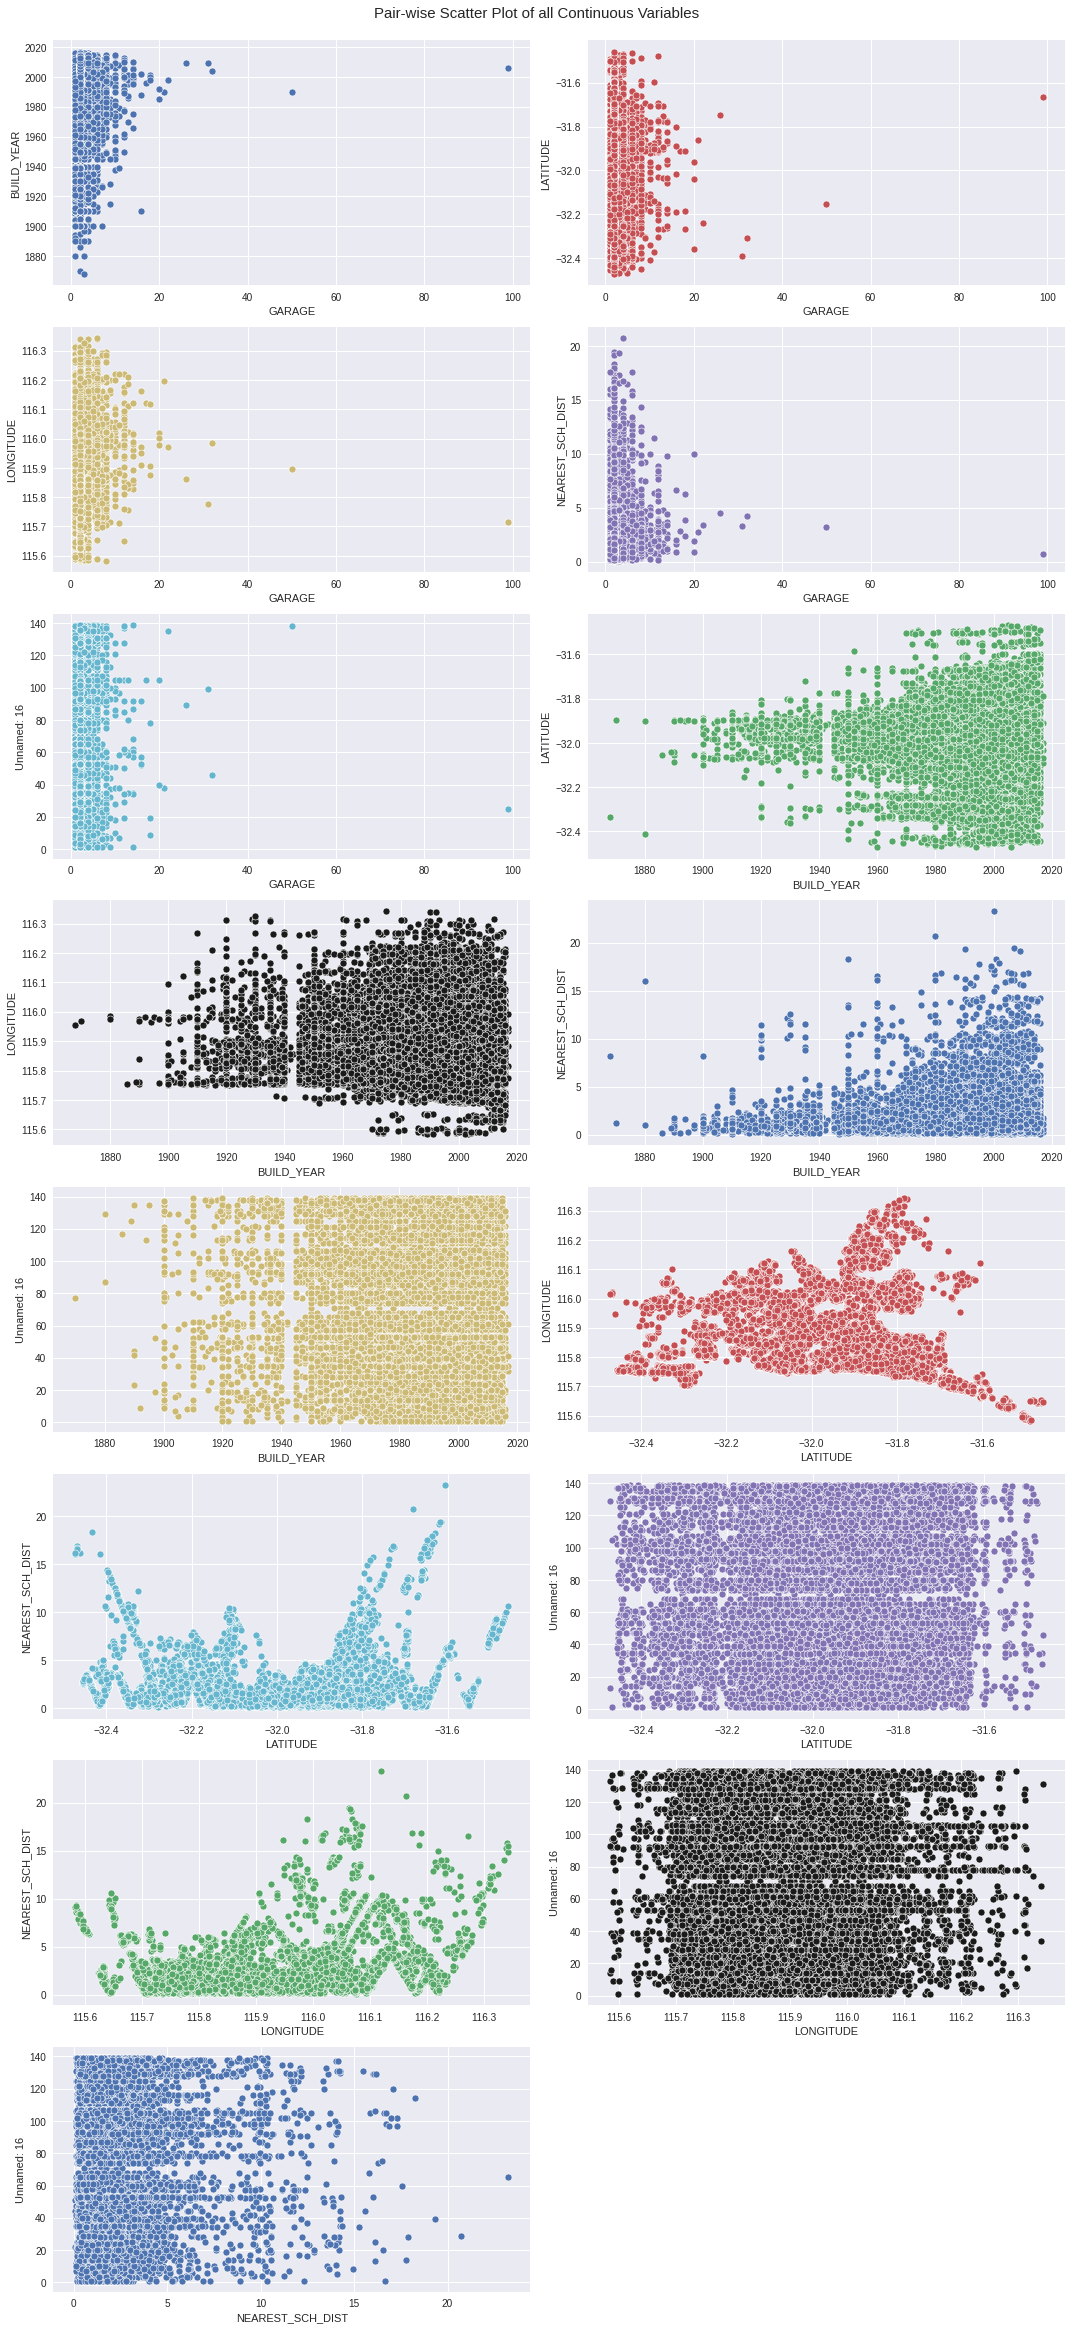

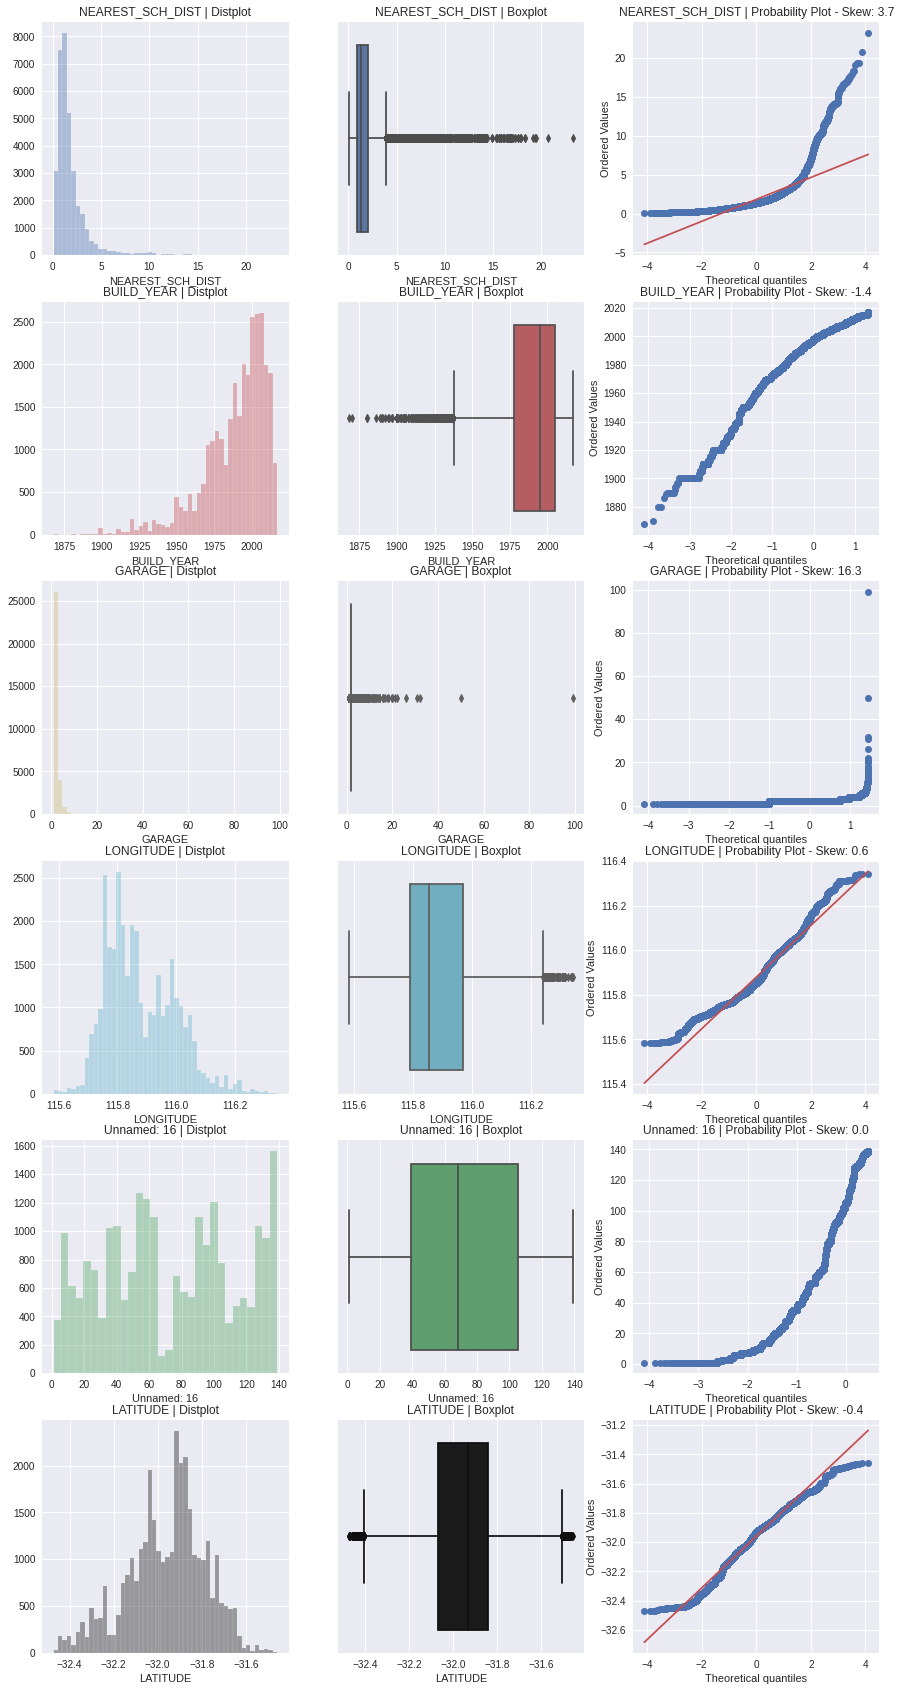

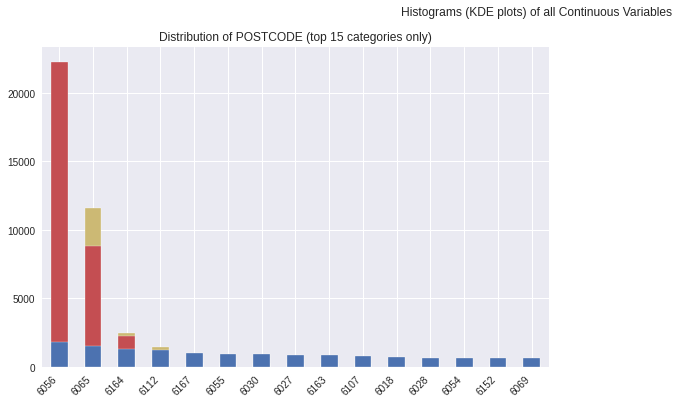

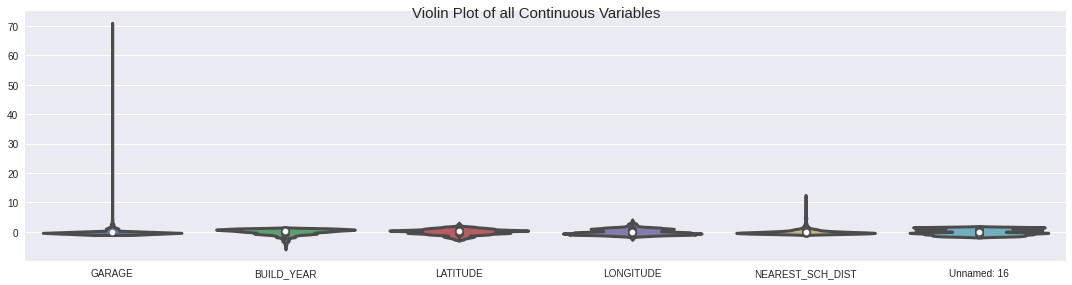

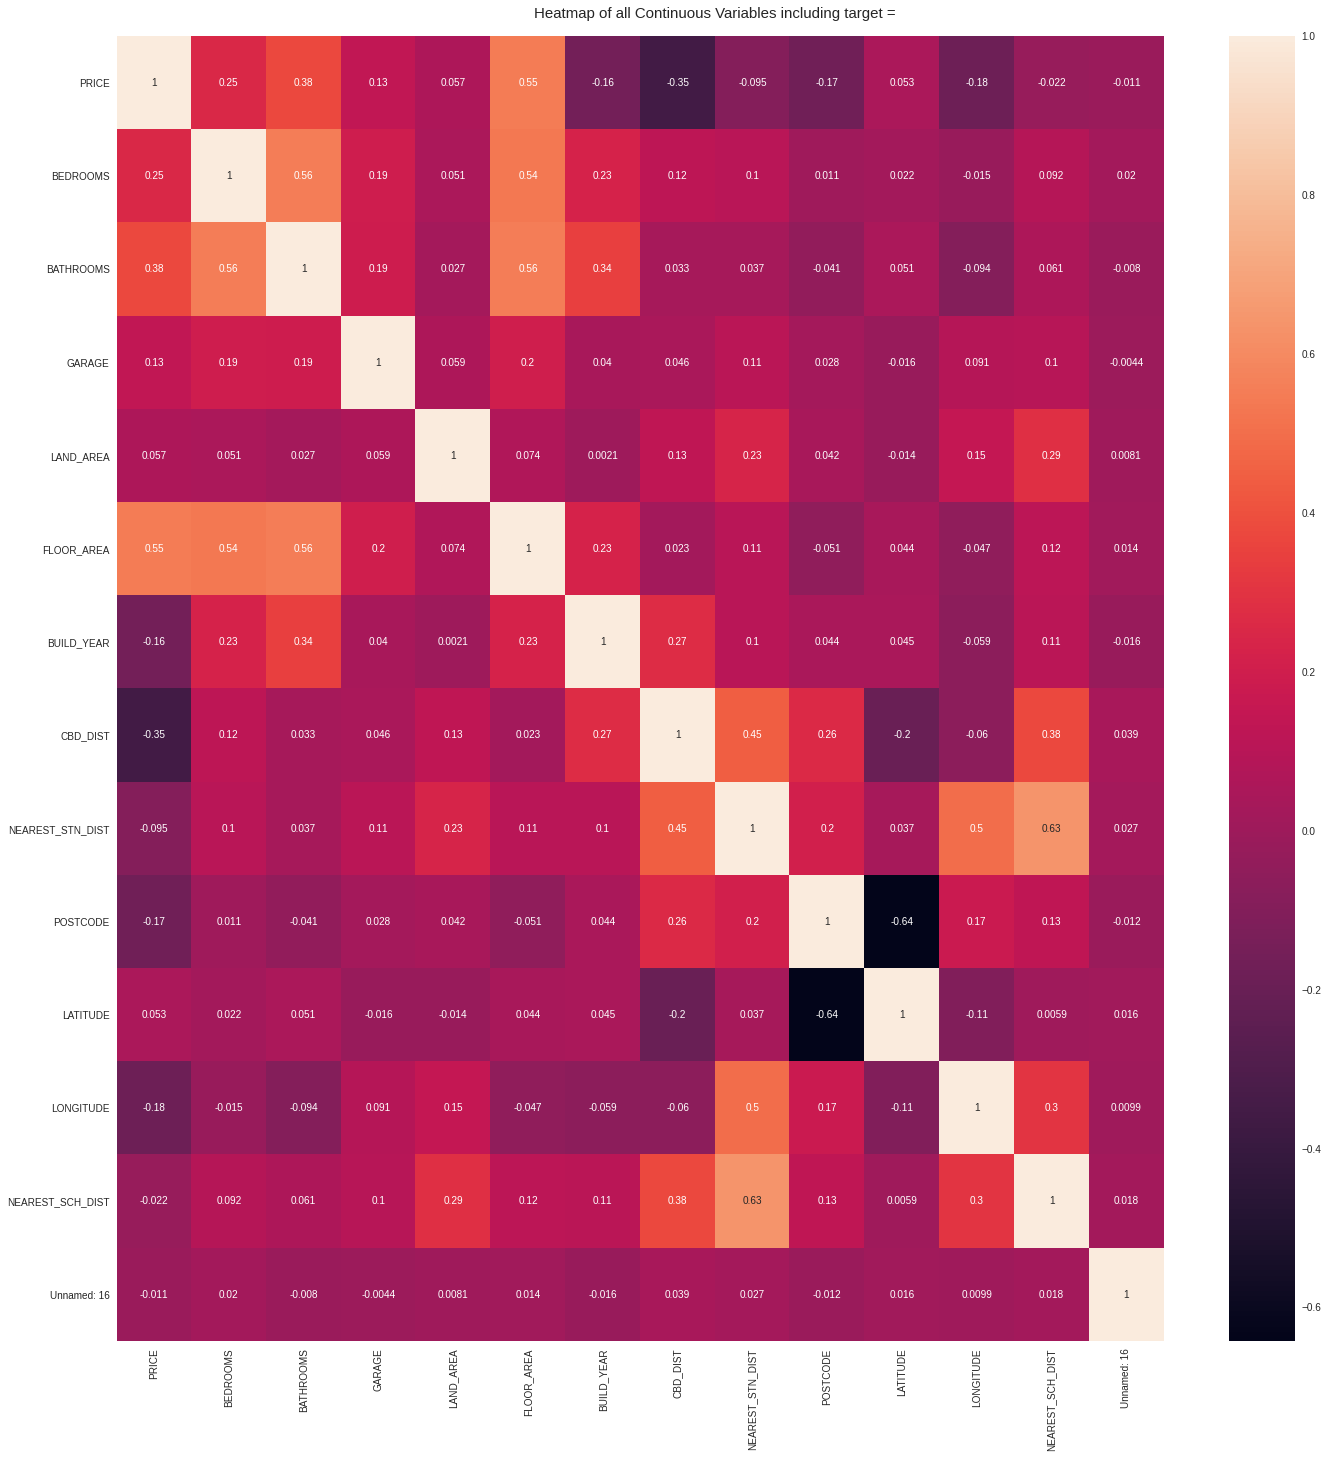

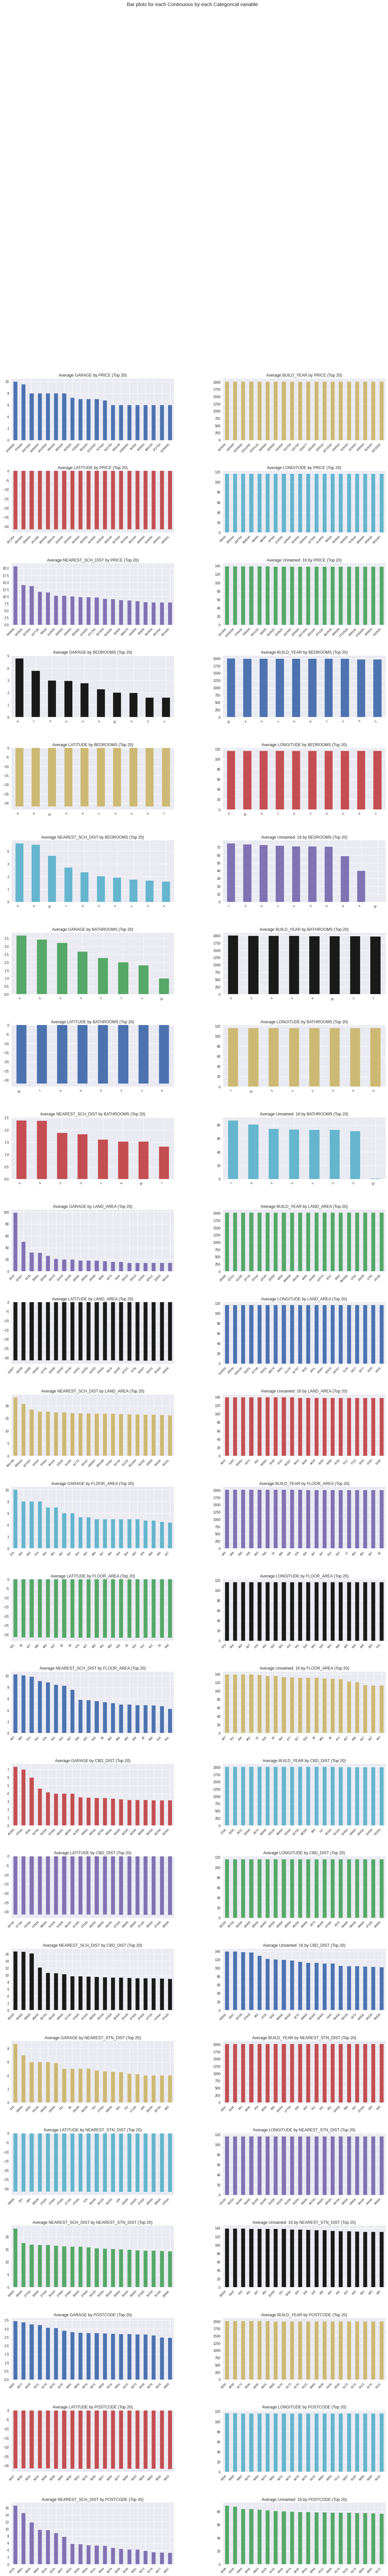

Time to run AutoViz (in seconds) = 38.210

 ###################### VISUALIZATION Completed ########################


In [25]:
dataa = AV.AutoViz('/content/all_perth_310121.csv')

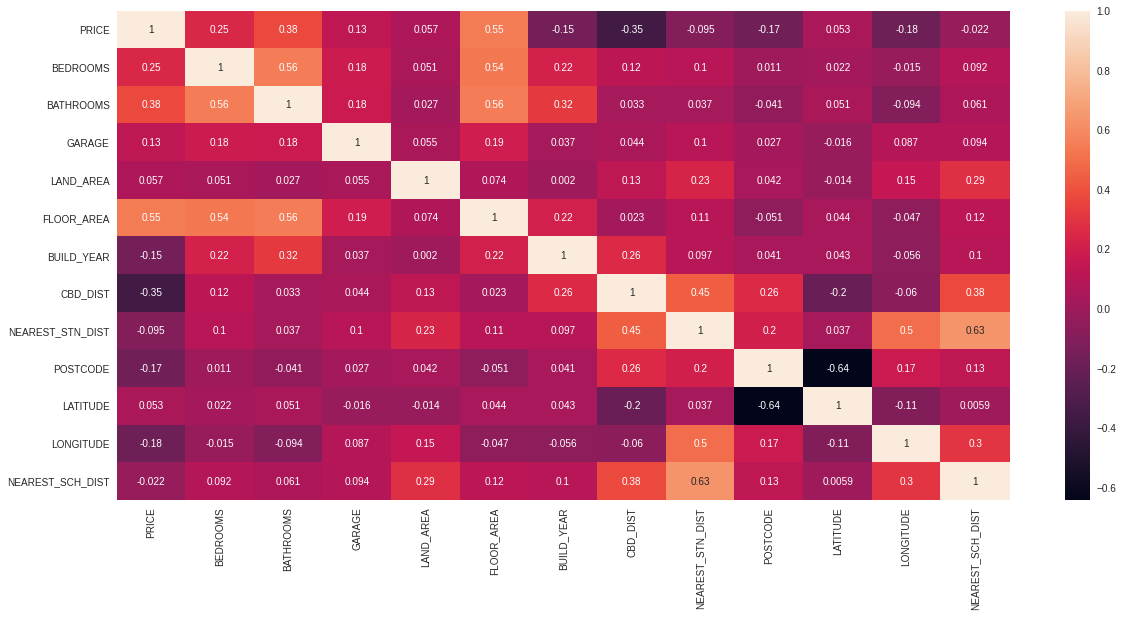

In [26]:
corr = df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

<Figure size 432x288 with 0 Axes>

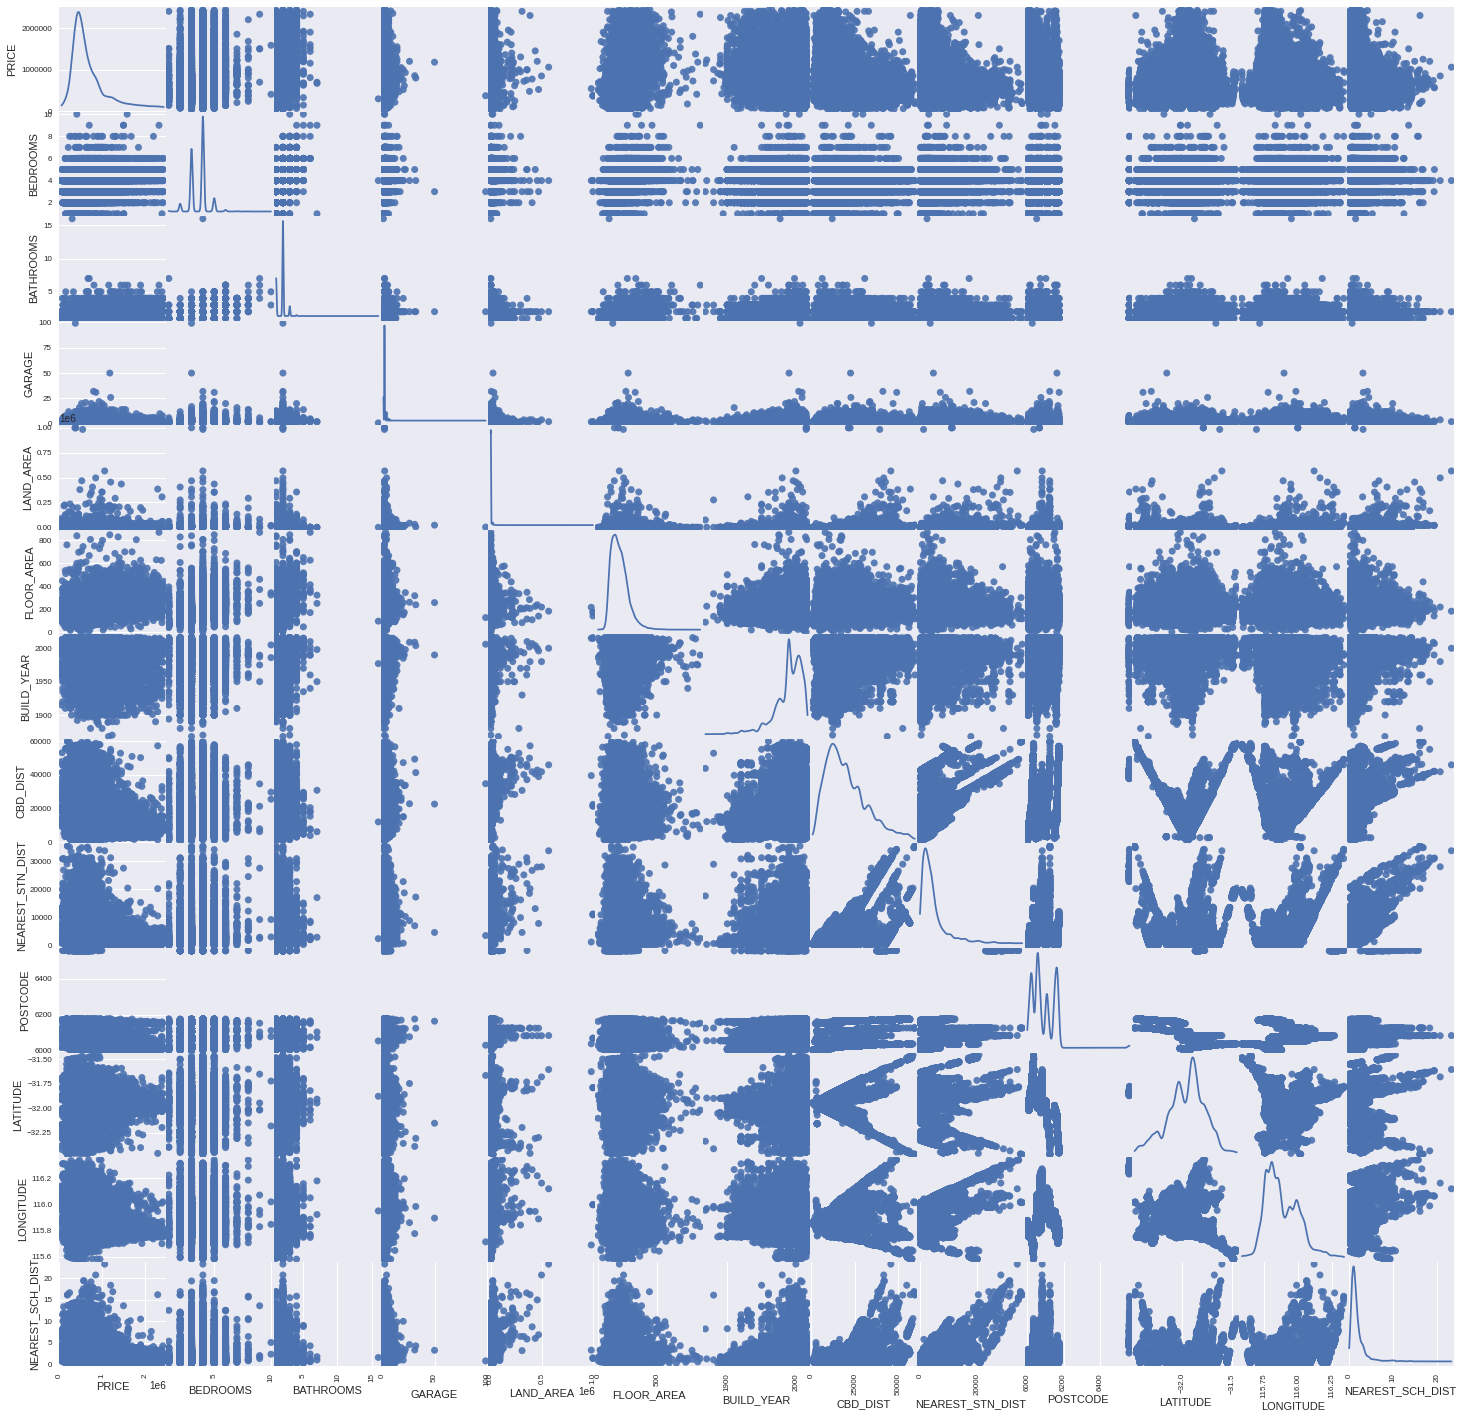

In [28]:
from pandas.plotting import scatter_matrix
fig = plt.figure()
scatter_matrix(df,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

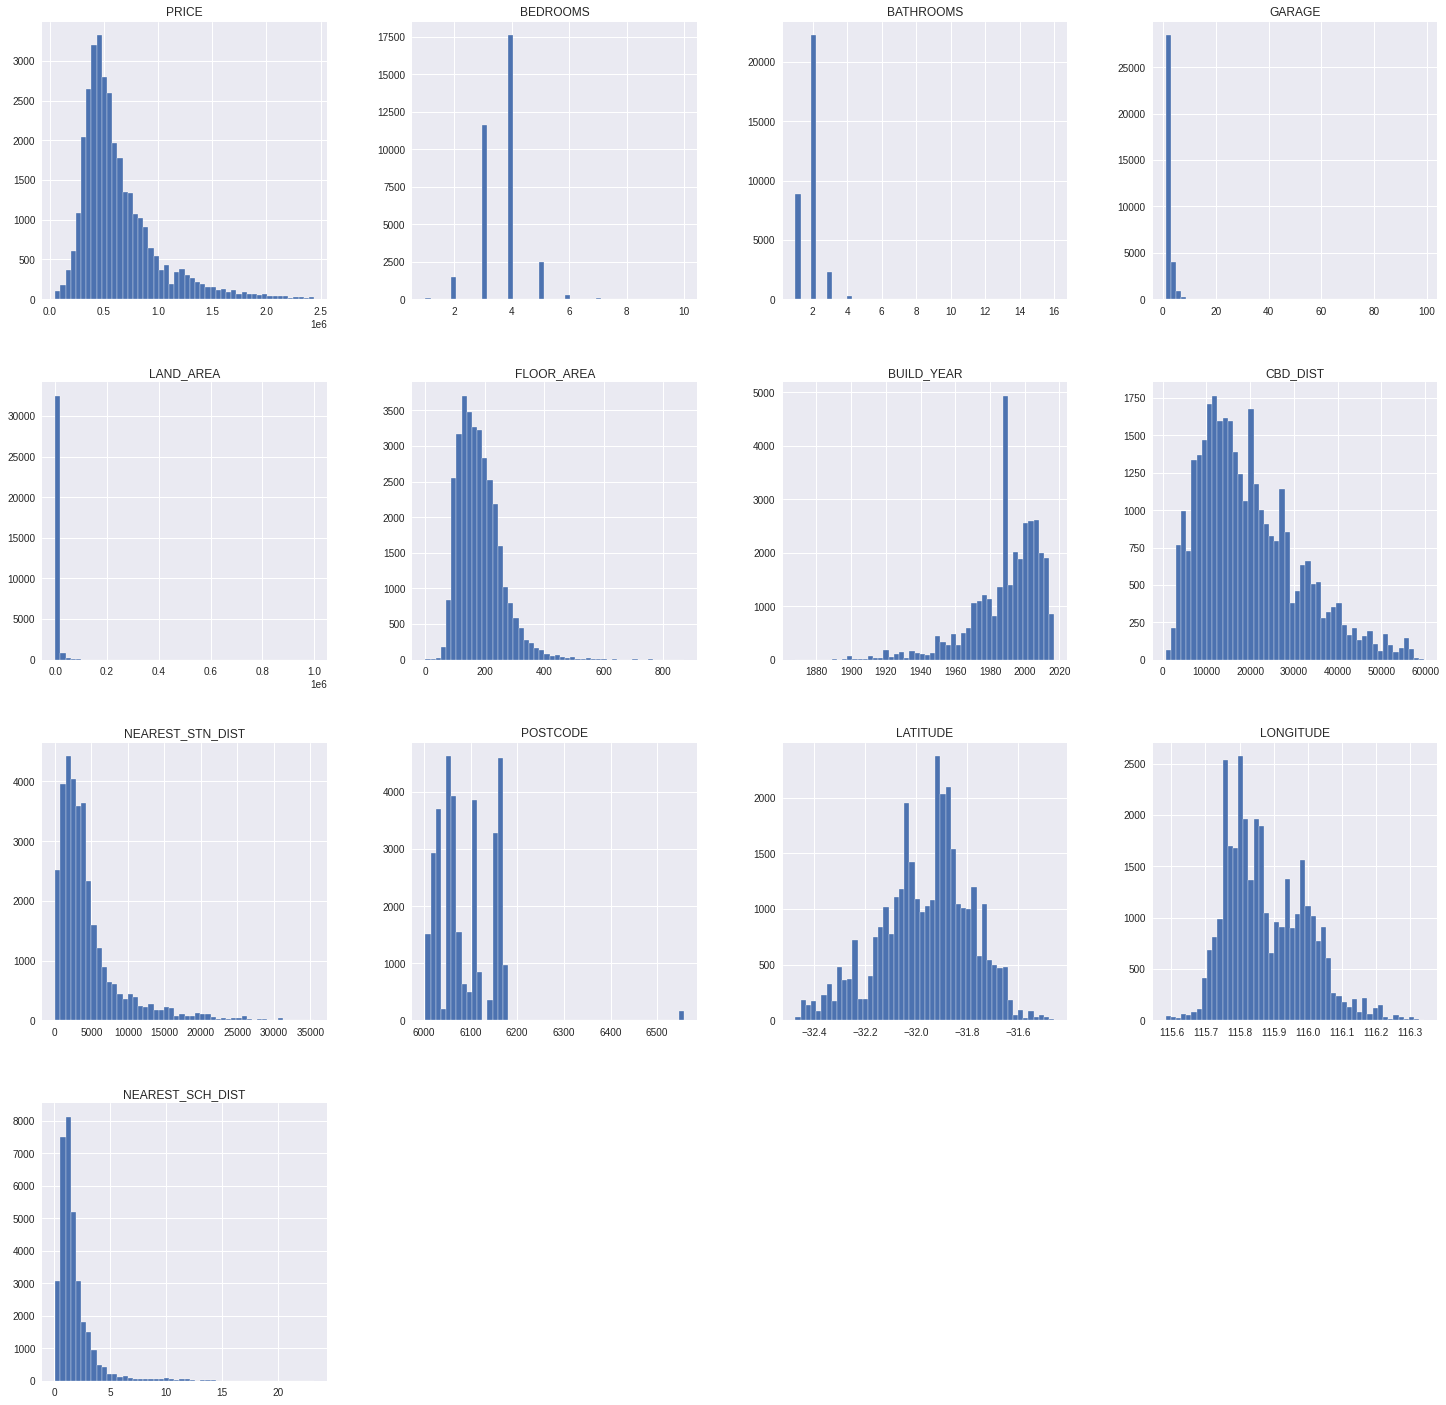

In [29]:
df.hist(figsize=(25,25),bins=50);

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['PRICE'], axis=1),
    df['PRICE'],
    test_size=0.3,
    random_state=0)

In [31]:
from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()
X_train= s_scaler.fit_transform(X_train)
X_test= s_scaler.fit_transform(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error
from autosklearn.regression import AutoSklearnRegressor
from autosklearn.metrics import mean_absolute_error as auto_mean_absolute_error

In [34]:
# define search
regressor=AutoSklearnRegressor(time_left_for_this_task=60*5) 
regressor.fit(X_train, y_train)
# summarize
print(regressor.sprint_statistics())
pred= regressor.predict(X_test)
mae = mean_absolute_error(y_test, pred)
print("MAE:" ,mae)


auto-sklearn results:
  Dataset name: d45d2610-acdf-11eb-826e-0242ac1c0002
  Metric: r2
  Best validation score: 0.798359
  Number of target algorithm runs: 17
  Number of successful target algorithm runs: 10
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 7
  Number of target algorithms that exceeded the memory limit: 0

MAE: 98785.64968876605


In [35]:
print(regressor.show_models())

[(0.420000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'polynomial', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0022298554040543614, 'feature_preprocessor:polynomial:degree': 2, 'feature_preprocessor:polynomial:include_bias': 'True', 'feature_preprocessor:polynomial:interaction_only': 'False', 'regressor:gradient_boosting:early_stop': 'train', 'regressor:gradient_boosting:l2_regularization': 1.3053128884667706e-10, 'regressor:gradient_boosting:learning_rate': 0.05594167483605857, 'regressor:gradient_boosting:loss': 'l